In [67]:
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math

# Problem 1

In [68]:
x = 3 # Average cosmic-ray background
y = 6 # Average number of gamma-rays emitted by the hypothetical source

## A) Show how the probability distribution changes

In [69]:
def graph (start, stop, data,scale,divisor,mu, convolutions, xmax = None,xmin = None, averageMax = None):
        
    if (xmax == None):
        xmax = stop
    if (xmin != None):
        start = xmin
    # Graphs the initiall distribution
    fig, ax = plt.subplots(1,1)
    if averageMax != None:
        plt.step(x=np.linspace(start,averageMax,xmax-start), y = data[start:xmax], where = 'mid')
        x = np.linspace(start, averageMax, 10000)
        ax.plot(x,scipy.stats.norm.pdf(x,scale = scale, loc = mu)/divisor,linewidth = 3,alpha = 0.7) # 6.1 fits the curve to the distribution
    
    else:
        plt.step(x=np.linspace(start,xmax,xmax-start), y = data[start:xmax], where = 'mid')
        x = np.linspace(start, xmax, 10000)
        ax.plot(x,scipy.stats.norm.pdf(x,scale = scale, loc = mu * (convolutions+1))/divisor,linewidth = 3,alpha = 0.7) # 6.1 fits the curve to the distribution
    
    plt.xlabel("Signal measured")
    plt.ylabel("Probability of occuring")
    plt.title("Distribution")
    plt.show()

    fig, ax = plt.subplots(1,1)
    if averageMax != None:
        plt.step(x=np.linspace(start,averageMax,xmax-start), y = data[start:xmax], where = 'mid')
        x = np.linspace(start, averageMax, 10000)
        ax.plot(x,scipy.stats.norm.pdf(x,scale = scale, loc = mu)/divisor,linewidth = 3,alpha = 0.7) # 6.1 fits the curve to the distribution
    
    else:
        plt.step(x=np.linspace(start,xmax,xmax-start), y = data[start:xmax], where = 'mid')
        x = np.linspace(start, xmax, 10000)
        ax.plot(x,scipy.stats.norm.pdf(x,scale = scale, loc = mu * (convolutions+1))/divisor,linewidth = 3,alpha = 0.7) # 6.1 fits the curve to the distribution
        
    plt.xlabel("Signal measured")
    plt.ylabel("Probability of occuring")
    plt.title("Semilog distribution")
    plt.semilogy()
    plt.show()


In [70]:
base_poisson = [-1]*25
for i in range(25):
    base_poisson[i] = scipy.stats.poisson.pmf(i, 3)

In [71]:
convolved_bins = base_poisson
for i in range(5):
    convolved_bins = np.convolve(convolved_bins, base_poisson)

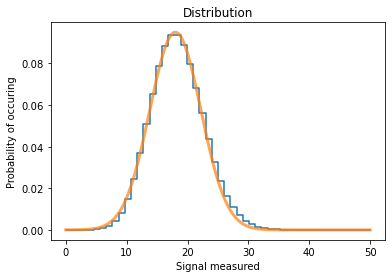

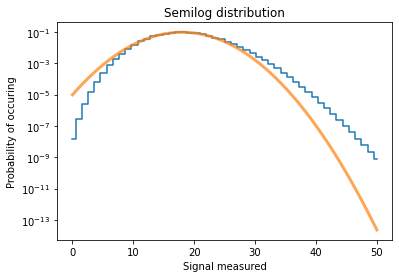

In [72]:
graph(0,len(convolved_bins), convolved_bins,4.2,1,x, 5,xmax = 50)

For 5 convolutions, we start to see that the graph begins to take a general shape of a gaussian. However, as we get towards the tails, we can see that the distribution begins to pull away from a gaussian on the semilog graph

In [73]:
convolved_bins = base_poisson
for i in range(20):
    convolved_bins = np.convolve(convolved_bins, base_poisson)

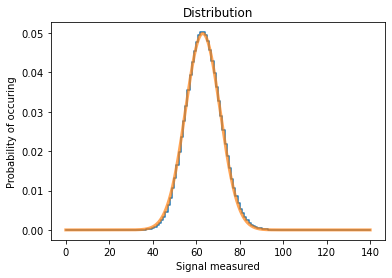

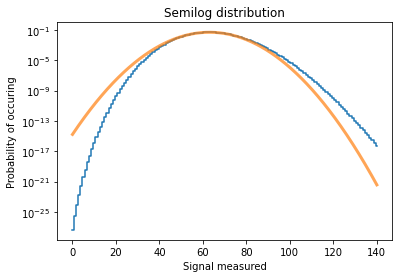

In [74]:
graph(0,len(convolved_bins), convolved_bins,8,1,x,20, xmax = 140)

Here we can see the poisson start to look more and more like a gaussian curve, particularly in the semilog-y chart and the smoothness

In [75]:
convolved_bins = base_poisson
for i in range(200):
    convolved_bins = np.convolve(convolved_bins, base_poisson)

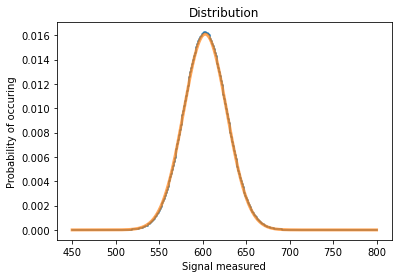

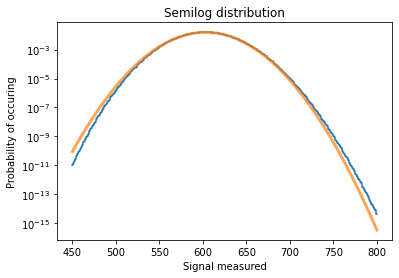

In [76]:
graph(0,len(convolved_bins), convolved_bins,24.8,1,x,200, xmax = 800, xmin = 450)

At 200 convolution we begin to see that the data resembles a gaussian much more closely, which is evident from the semilog-y plot. Here we can see that even towards the tails the data resembles a gaussian fairly closely, which is to be expected, as all distributions, including gaussians convolve into gaussians.

## B) After 5 days the summed probability distribution is still Poisson

In [77]:
convolved_bins = base_poisson
for i in range(5):
    convolved_bins = np.convolve(convolved_bins, base_poisson)

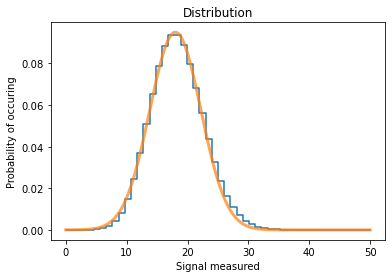

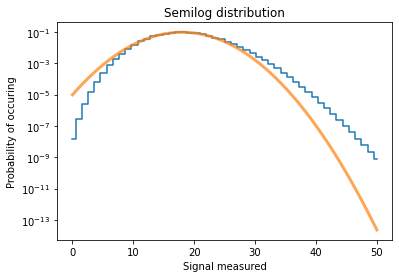

In [78]:
graph(0,len(convolved_bins), convolved_bins,4.2,1,x, 5,xmax = 50)

While the standard plot can lead one to believe that the distribution is gaussian, we can see from the semilog-y plot the telltale signs of a Poisson distribution. this is shown in the sharp rise from the left towards the mean, with a more gradual falloff as the signal meassured goes to the right, as opposed to the parabolic nature of the gaussian curve.

## C) Probability distribution evolution as you average days

In [79]:
convolved_bins = base_poisson
for i in range(5):
    convolved_bins = np.convolve(convolved_bins, base_poisson)

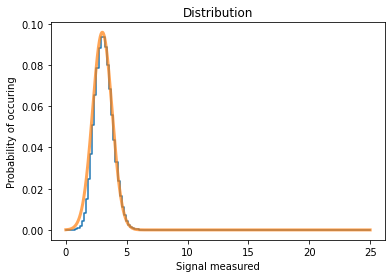

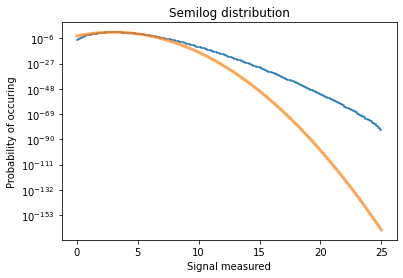

In [80]:
graph(0,len(convolved_bins), convolved_bins, 0.8,5.2,x, 5, averageMax = 25)

We see that the average remains the same, however, the distribution begins to slightly narrow towards the mean

In [81]:
convolved_bins = base_poisson
for i in range(20):
    convolved_bins = np.convolve(convolved_bins, base_poisson)

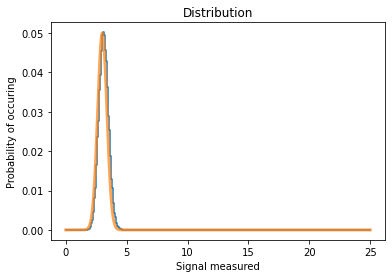

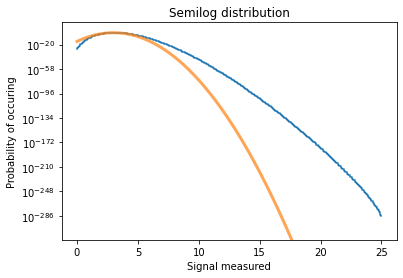

In [82]:
graph(0,len(convolved_bins), convolved_bins, 0.38,21,x, 20, averageMax = 25)

We see a much sharper peak at the average as we increase the convolutions

In [83]:
convolved_bins = base_poisson
for i in range(200):
    convolved_bins = np.convolve(convolved_bins, base_poisson)

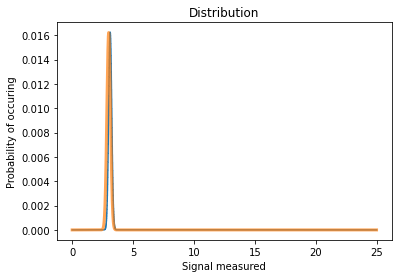

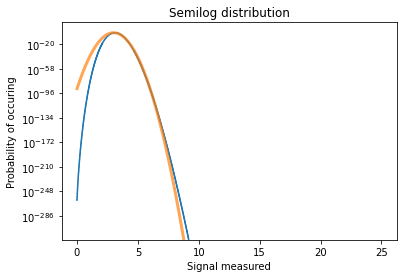

In [84]:
graph(0,len(convolved_bins), convolved_bins, 0.15,164,x, 200, averageMax = 25)

Here we see an extremely sharp peak around the mean, with very little distribution away from it. From this we can deduce that as we continue to increase the number of convolutions, we see that the average begins to narrow in on the $\mu$ from the Poisson distribution equation. In addition, it starts to resemble more and more a gaussian with a very small standard deviation. This is the key to relating to part B. The Poisson distribution still is the deciding factor over what the average will look like, but in only so much as the mean of the average. While yes there is an influence on the shape, we can see the shape begin to look less and less like a Poisson distribution and more and more like a gaussian, which follows the central limit theorem.

## D) Calculate the 'sigma' of your observation

In [85]:
observation_days = 10
gamma_ray_total = observation_days * y

In [86]:
convolved_bins = base_poisson
for i in range(observation_days):
    convolved_bins = np.convolve(convolved_bins, base_poisson)

In [87]:
total_prob = 0
for prob in convolved_bins[gamma_ray_total:]:
    total_prob += prob
sigma = scipy.stats.norm.isf(total_prob)
print("Probability: \t" + str(total_prob))
print("Sigma: \t\t" + str(sigma))

Probability: 	1.5432143894689496e-05
Sigma: 		4.166993808122153


# Problem 2

## A) How the distribution changes

In [95]:
bins = [-1]*500
start = 0
for i, end in zip(range(500), np.linspace(0,10,500)):
    bins[i] = scipy.stats.rayleigh.pdf(end) - scipy.stats.rayleigh.pdf(start)
    start = end

In [96]:
bins

[0.0,
 0.020036056467996752,
 0.0200119240073876,
 0.019963707523654554,
 0.01989150375567624,
 0.019795457472033207,
 0.01967576106469686,
 0.019532654009565248,
 0.01936642219579046,
 0.01917739712631214,
 0.01896595499247003,
 0.01873251562601866,
 0.018477541332294456,
 0.0182015356087063,
 0.01790504175311436,
 0.017588641367041635,
 0.017252952759019557,
 0.016898629253699393,
 0.01652635741267333,
 0.01613685517323188,
 0.01573086991153788,
 0.015309176436934524,
 0.014872574924293613,
 0.014421888791496584,
 0.01395796252926973,
 0.013481659490715725,
 0.01299385964796329,
 0.012495457323404402,
 0.011987358903018053,
 0.01147048053926042,
 0.010945745850972022,
 0.010414083627676374,
 0.00987642554555479,
 0.009333703902250967,
 0.008786849377512507,
 0.008236788826494923,
 0.007684443112351169,
 0.007130724984505177,
 0.0065765370087542685,
 0.006022769555082297,
 0.005470298848762489,
 0.004919985090036771,
 0.00437267064731961,
 0.003829178328543681,
 0.003290309734906516,
